# 📓 Notebook 3: Linear Regression

In this notebook, we apply **linear regression** to predict the Air Quality Index (AQI) considring the dataset **Taiwan Air Quality Index Data 2016~2024**.


## 1. Initial Setup

We import the necessary libraries for:
- data manipulation (`pandas`, `numpy`)
- visualization (`matplotlib`)
- linear regression and evaluation metrics (`scikit-learn`)


In [1]:
# REQUIRED IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split

### Loading the Dataset

- Load the CSV file containing air quality data



In [4]:
from google.colab import drive
drive.mount('/content/drive')

cwd = 'drive/MyDrive/' # Set your current working directory where the csv file is located

# Check if file exists
file_path = cwd + 'es_python/air_quality.csv'
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The CSV file was not found at the path: {file_path}")

# Load dataset (first 1,000,000 rows for testing)
df = pd.read_csv(file_path, low_memory=False, na_values=['-', 'NA', 'n/a', 'ND',''], nrows=1000000)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Data Cleaning
- Convert categorical features into numeric values
- Assign:
  - **X** = `numeric_cols` (independent variables)
  - **y** = `aqi` (target variable to predict)


In [5]:
empty_cols = df.columns[df.isna().all()].tolist()
print("Columns removed because completely empty:", empty_cols)

from sklearn.preprocessing import LabelEncoder

# Drop completely empty columns (Unit)
df = df.dropna(axis=1, how='all')

# Encode categorical columns (trasformo feature da utilizzare per la regressione in numerico)
le_pollutant = LabelEncoder()
le_county = LabelEncoder()
df["county"] = le_county.fit_transform(df["county"].astype(str))
le_sitename = LabelEncoder()
df["sitename"] = le_sitename.fit_transform(df["sitename"].astype(str))

# Select only numeric columns (excluding 'aqi', which is the target)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('aqi')

# Drop rows with missing values in features or target
df_clean = df.dropna(subset=numeric_cols + ['aqi']).copy()

# Define X and y
X = df_clean[numeric_cols]
y = df_clean['aqi']

print("Numeric columns retained:", numeric_cols)

Columns removed because completely empty: ['unit']
Numeric columns retained: ['sitename', 'county', 'so2', 'co', 'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no', 'windspeed', 'winddirec', 'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg', 'longitude', 'latitude', 'siteid']


## 3. Dataset Split

We split the data into a training set and a test set (70/30), with `random_state` set to 1 to make the experiment reproducible.



In [6]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3. Model Training

We create a `LinearRegression` model and train it on the training data.


In [7]:
# Create and train the model
model = LinearRegression()
#fit addestra modello
model.fit(X_train, y_train)

LinearRegression()

## 4. Model Evaluation

We make predictions on the test data and calculate performance metrics:  
- Mean Squared Error (MSE)  
- Root Mean Squared Error (RMSE)


In [9]:
# Prediction
y_pred = model.predict(X_test)

# Checking mimimum and maximum value of aqi
print(f"Minimum value of aqi: {y_test.min():.2f}")
print(f"Maximum value of aqi: {y_test.max():.2f}")
print(f"Range of values: {y_test.max()-y_test.min():.2f}")

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
rmse_mine = np.sqrt(mse)
#6.66 significa che con range di 196 sto sbagliando in media di 6 (circa 3%)

# Output
print("\n\nModel Performance (Multivariate Linear Regression):")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Root Mean Squared Error (computed starting from MSE): {rmse_mine:.2f} <- clearly equals to above value")

#(rmse/range di valori)*100
print(f"RMSE on aqi range (%): {(rmse/(y_test.max()-y_test.min()))*100:.2f}")


Minimum value of aqi: 5.00
Maximum value of aqi: 201.00
Range of values: 196.00


Model Performance (Multivariate Linear Regression):
Mean Squared Error: 44.30
Root Mean Squared Error: 6.66
Root Mean Squared Error (computed starting from MSE): 6.66 <- clearly equals to above value
RMSE on aqi range (%): 3.40


- **Interpretation**:
  - `MSE (Mean Squared Error)` is the average of squared errors, emphasizing larger errors and giving an idea of the severity of major deviations.
  - `RMSE (Root Mean Squared Error)` quantifies the average prediction error, expressed in the same units as the target. Lower values indicate more accurate predictions.

- **Performance Evaluation**:
  - `MSE`: **44.30** → on average, the squared difference between actual and predicted values is about 44.30, which seems reasonable.
  - `RMSE`: **6.66** → very low average error compared with aqi values range (3%), indicative of good performance.

**The model is effective at estimating AQI from the environmental variables in the dataset, but it can be made more robust by adding more numerical features.**


## Comparison Between Actual and Predicted Values

We create a scatter plot to compare the predicted values with the actual values.



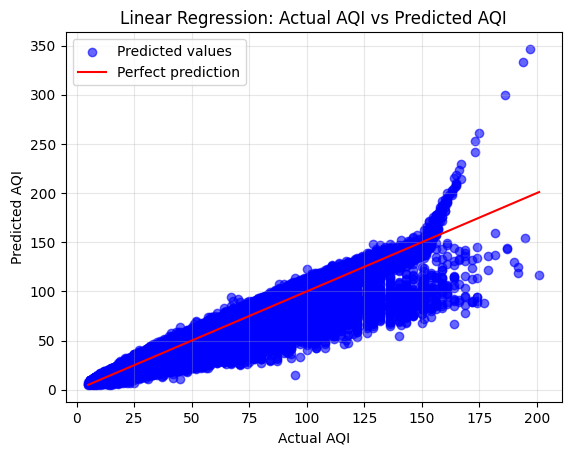

In [ ]:
# Plot comparison of predicted vs actual values
#asse x valori reali e asse y valori predetti
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted values')
#retta y=x cioè linea di predizione perfetta, diagonale a 45 gradi pendenza 1
#se punto cade sulla linea significa che valore predetto=valore reale
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Perfect prediction')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Linear Regression: Actual AQI vs Predicted AQI")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Comparison Between Actual and Predicted Values

The plot shows the comparison between the actual **Air Quality Index (AQI)** values and the values predicted by the **linear regression** model, trained using all available features in the dataset.

- The **blue dots** represent the *(actual AQI, predicted AQI)* pairs for each sample in the test set.
- The **red line** represents the ideal perfect prediction, where all points satisfy `y_pred = y_test`.


## Polynomial Regression (Brief Attempt)


In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define a polynomial model of degree 2
poly_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

# Training
poly_model.fit(X_train, y_train)

# Predictions and metric calculations
y_pred_poly = poly_model.predict(X_test)
mse_poly    = mean_squared_error(y_test, y_pred_poly)
rmse_poly   = root_mean_squared_error(y_test, y_pred_poly)

print("Polynomial Regression (degree 2) on the features:", numeric_cols)
print(f"Mean Squared Error: {mse_poly:.2f}")
print(f"Root Mean Squared Error: {rmse_poly:.2f}")

Polynomial Regression (degree 2) on the features: ['sitename', 'county', 'so2', 'co', 'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no', 'windspeed', 'winddirec', 'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg', 'longitude', 'latitude', 'siteid']
Mean Squared Error: 22.89
Root Mean Squared Error: 4.78


## Model Evaluation: Predicted vs Actual

To better assess the performance of the **Polynomial Regression (degree 2)**, we generated a **scatter plot** that compares the actual values (`y_test`) with the predicted values from the model (`y_pred_poly`).


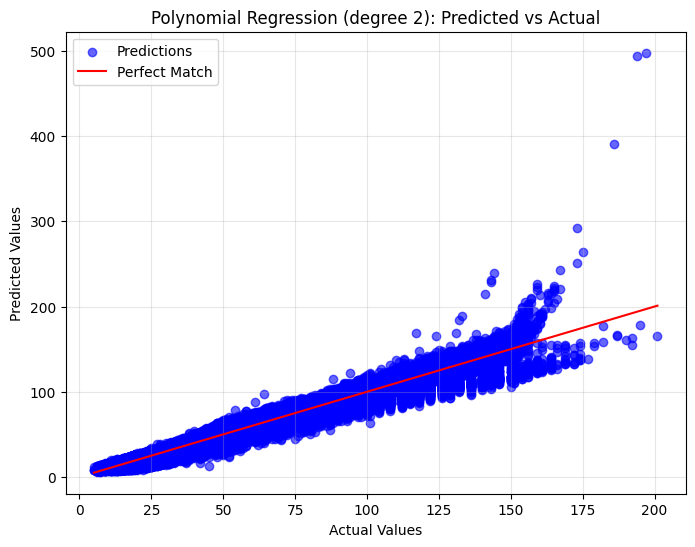

In [11]:
# Scatter plot: actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Perfect Match')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression (degree 2): Predicted vs Actual')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### What the plot shows:
- The **blue dots** represent the pairs `(actual value, predicted value)` for each test sample.  
- The **red dashed line** represents the *"Perfect Match Line"*, the bisector `y_pred = y_test`.

### How to read the output:
- Most of the points follow a consistent upward trend: as the actual values increase, the predicted values also increase.  
- A greater dispersion of points is observed when the actual values exceed ~150.  

### In conclusion:
- Compared to linear regression, the polynomial regression model of degree 2 produces predictions that are closer to the ideal line, as the point cloud is more aligned with the red line.


## Exercise

Perform **linear regression** considering the following smaller sets of features and compare the results obtained by considering all the features:
1. **Remove 'sitename':** 'county', 'so2', 'co', 'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no', 'windspeed', 'winddirec', 'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg', 'longitude', 'latitude', 'siteid'
2. **Remove information about geographical position ('siteid', 'sitename', 'county', 'latitude', 'longitude'):** 'so2', 'co', 'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no', 'windspeed', 'winddirec', 'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg'
3. **Remove geographical position and average values of pollutant ('pm2.5_avg', 'pm10_avg', 'so2_avg'):** 'so2', 'co', 'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no', 'windspeed', 'winddirec', 'co_8hr'
4. **Remove geographical position, avg pollutant values and wind information (removed 'windspeed', 'winddirec'):** 'so2', 'co', 'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no', 'co_8hr'

Write MSE and RMSE for each model and plot the dot clouds of each model.


In [12]:
# Create lists containing linear regression models and results for each model
models = [LinearRegression() for i in range(4)]
y_preds = [None for i in range(4)]
mses = [None for i in range(4)]
rmses = [None for i in range(4)]

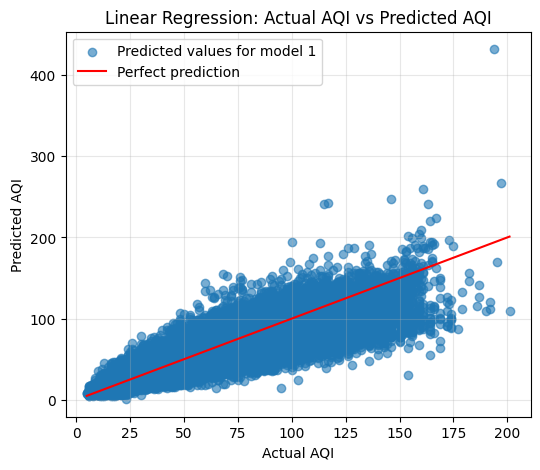

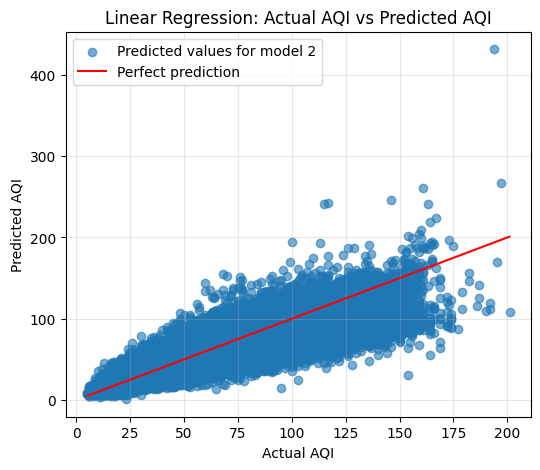

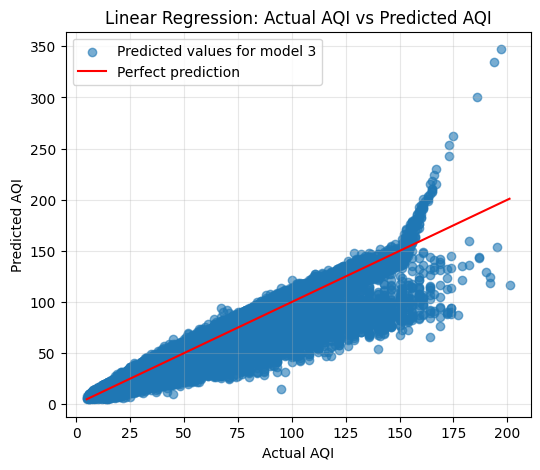

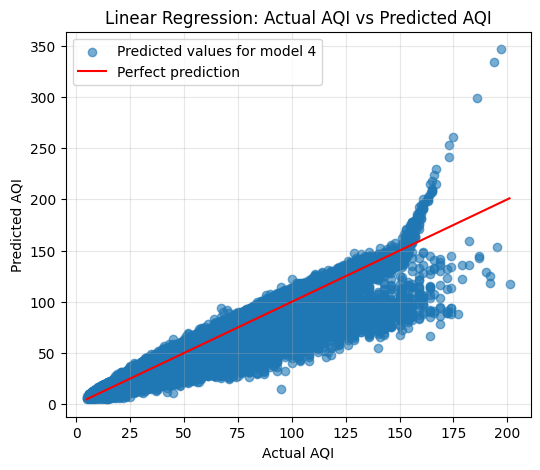

In [16]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('aqi')
# Define X and y
X = df_clean[numeric_cols]
y = df_clean['aqi']

# Define the set of features for model 1
feature_1 = numeric_cols.copy()
feature_1.remove('sitename')

# Define the set of features for model 2
feature_2 = feature_1.copy()
cols_to_remove = ['siteid', 'county', 'latitude', 'longitude']
feature_2 = [col for col in feature_2 if col not in cols_to_remove]

# Define the set of features for model 3
feature_3 = feature_2.copy()
cols_to_remove = ['pm2.5_avg', 'pm10_avg', 'so2_avg']
feature_3 = [col for col in feature_3 if col not in cols_to_remove]

# Define the set of features for model 4
feature_4 = feature_3.copy()
cols_to_remove = ['windspeed', 'winddirec']
feature_4 = [col for col in feature_4 if col not in cols_to_remove]

# For each set of features
for i,feature in enumerate([feature_1, feature_2, feature_3, feature_4]):
  # Remove features from X
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  X_train_set = X_train[feature]
  X_test_set  = X_test[feature]

  # Create and train a new Linear Regression model
  models[i]=LinearRegression()
  models[i].fit(X_train_set, y_train)
  y_preds[i]=models[i].predict(X_test_set)
  # Check performance
  mses[i]=mean_squared_error(y_test, y_preds[i])
  rmses[i]=root_mean_squared_error(y_test, y_preds[i])

# Plot comparison of predicted vs actual values for all the models
for i in range(4):
  plt.figure(figsize=(6,5))
  plt.scatter(y_test, y_preds[3-i], alpha=0.6, label=f"Predicted values for model {i + 1}")
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Perfect prediction')
  plt.xlabel("Actual AQI")
  plt.ylabel("Predicted AQI")
  plt.title("Linear Regression: Actual AQI vs Predicted AQI")
  plt.legend(loc="upper left")
  plt.grid(alpha=0.3)
# Suggestion: create a different plot for each model or create a single plot where
# the results of the worst models first because they have larger scatter plots which,
# if printed last, would completely cover the scatter plots of the best models.




### Solution


Size considering feature set for model 1:
X_train_set: (621054, 19)
X_test_set: (266166, 19)

Performance of model 1:
Mean Squared Error: 44.31
Root Mean Squared Error: 6.66

Size considering feature set for model 2:
X_train_set: (621054, 15)
X_test_set: (266166, 15)

Performance of model 2:
Mean Squared Error: 44.40
Root Mean Squared Error: 6.66

Size considering feature set for model 3:
X_train_set: (621054, 12)
X_test_set: (266166, 12)

Performance of model 3:
Mean Squared Error: 102.61
Root Mean Squared Error: 10.13

Size considering feature set for model 4:
X_train_set: (621054, 10)
X_test_set: (266166, 10)

Performance of model 4:
Mean Squared Error: 102.62
Root Mean Squared Error: 10.13


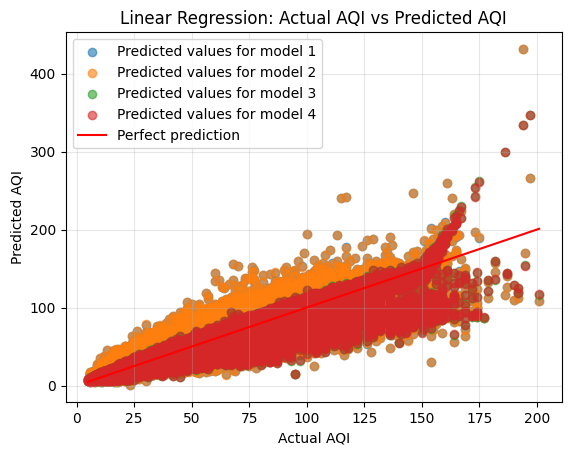

In [ ]:
# Define the set of features for model 1
feature_1 = numeric_cols.copy()
feature_1.remove('sitename')

# Define the set of features for model 2
feature_2 = feature_1.copy()
feature_2.remove('siteid')
feature_2.remove('county')
feature_2.remove('latitude')
feature_2.remove('longitude')

# Define the set of features for model 3
feature_3 = feature_2.copy()
feature_3.remove('pm2.5_avg')
feature_3.remove('pm10_avg')
feature_3.remove('so2_avg')

# Define the set of features for model 4
feature_4 = feature_3.copy()
feature_4.remove('windspeed')
feature_4.remove('winddirec')

# For each set of features
features_sets = [feature_1, feature_2, feature_3, feature_4]

for i in range(len(features_sets)):
    # Remove features from X
    X_train_set = X_train[features_sets[i]]
    X_test_set  = X_test[features_sets[i]]
    # Check sizes
    print(f"\nSize considering feature set for model {i + 1}:")
    print(f"X_train_set: {X_train_set.shape}")
    print(f"X_test_set: {X_test_set.shape}")

    # Create and train a new Linear Regression model
    models[i] = LinearRegression()
    models[i].fit(X_train_set, y_train)

    # Check performance
    y_preds[i] = models[i].predict(X_test_set)
    mses[i]    = mean_squared_error(y_test, y_preds[i])
    rmses[i]   = root_mean_squared_error(y_test, y_preds[i])

    print(f"\nPerformance of model {i + 1}:")
    print(f"Mean Squared Error: {mses[i]:.2f}")
    print(f"Root Mean Squared Error: {rmses[i]:.2f}")


# Plot comparison of predicted vs actual values for all the models
# Suggestion: create a different plot for each model or create a single plot where
# the results of the worst models first because they have larger scatter plots which,
# if printed last, would completely cover the scatter plots of the best models.
for i in range(len(features_sets)):
  plt.scatter(y_test, y_preds[3-i], alpha=0.6, label=f"Predicted values for model {i + 1}")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Perfect prediction')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Linear Regression: Actual AQI vs Predicted AQI")
plt.legend(loc="upper left")
plt.grid(alpha=0.3)
plt.show()

